<a href="https://colab.research.google.com/github/aka-gera/Regression/blob/main/regression_fake_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/atulsehwag00/regression-fake-data

In [79]:
data_dir = f'atulsehwag00/regression-fake-data'

# Import Dataset

In [80]:
! pip install shap
import shap


In [81]:
! pip install kaggle

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
!pwd
%cd /content

/content/drive/My Drive/ML2023/data-analysis
/content


In [84]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [85]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [86]:
! chmod 600 ~/.kaggle/kaggle.json

In [87]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/atulsehwag00/regression-fake-data
License(s): unknown
regression-fake-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [88]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['regression-fake-data.zip']

In [89]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['fake_reg.csv']

# Import the helper classes

In [90]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [91]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter
from aka_data_analysis.aka_regression import aka_regression_analysis

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [92]:
from aka_data_analysis.aka_nn import aka_nn

In [93]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [94]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')

In [95]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [97]:
fig = aka_plot.Plot_histogram_Features(df,[0,1,2] )
if fig is not None:
    fig.show()

In [98]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


# Clean Dataset

## Drop Duplicate data

In [99]:
df.drop_duplicates()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


## Swap the target and the last feature

In [100]:
df = aka_clean.swap_features(df,0)
df.head()

,feature1,feature2,price
0,999.787558,999.766096,461.527929
1,998.861615,1001.042403,548.130011
2,1000.070267,998.844015,410.297162
3,999.952251,1000.440940,540.382220
4,1000.446011,1000.338531,546.024553


### Drop feature(s)


In [101]:
feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

,feature1,feature2,price
0,999.787558,999.766096,461.527929
1,998.861615,1001.042403,548.130011
2,1000.070267,998.844015,410.297162
3,999.952251,1000.440940,540.382220
4,1000.446011,1000.338531,546.024553


##  Convert categorical variables into numerical representations

In [102]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,feature1,feature2,price
0,999.787558,999.766096,461.527929
1,998.861615,1001.042403,548.130011
2,1000.070267,998.844015,410.297162
3,999.952251,1000.440940,540.382220
4,1000.446011,1000.338531,546.024553


## Balance Dataset

In [103]:
# aka_plot.plot_pie(df,-1)

In [104]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [105]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [106]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .5      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 5 outliers and remove 1 feature(s)
The filtered dataset's shape is (995, 2) 


## Graph the features that are highly correlated


In [107]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

### Visualize the distribution of the filtered dataset

In [108]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [109]:
pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

## Linear Regression

In [110]:

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score


clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (Linear Regression):", r2_score(y_test, y_pred))

R-squared score (Linear Regression): 0.21909939393706557


In [111]:
params = np.append(clf.intercept_,clf.coef_)
print(params)
y_pred = clf.predict(X_train)
feat_name = df_filtered.columns[:-1]

aka_regression_analysis().plot_regression_summary(X_train, y_train, y_pred, params, feat_name)

[501.16478158  39.03272485]
[3.17548085 3.20069893]


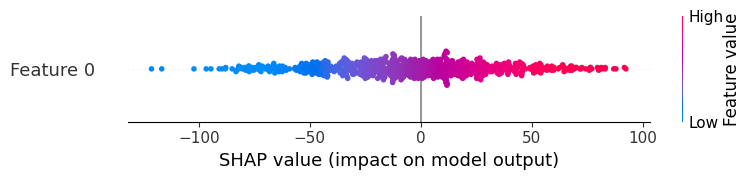

In [112]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

## Xgboost Regression

In [113]:
import xgboost as xgb  # Importing xgboost library as xgb

clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("R-squared score (XGBoost classifier):", r2_score(y_test, y_pred))


R-squared score (XGBoost classifier): -0.04642430822986743


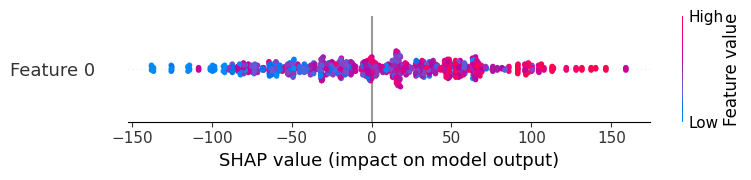

In [114]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# Statsmodels Regression

In [115]:

from statsmodels.regression import linear_model
from statsmodels.api import add_constant

# Add a constant to the independent variable matrix
X_train_with_const = add_constant(X_train)

# Fit the OLS model
model = linear_model.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary of the regression results
print("Summary:")
print(results.summary())


Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     148.7
Date:                Fri, 10 May 2024   Prob (F-statistic):           3.93e-31
Time:                        06:56:45   Log-Likelihood:                -4068.5
No. Observations:                 696   AIC:                             8141.
Df Residuals:                     694   BIC:                             8150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.1648      3.175    157.823

# Neural Net

## Neural Network Parameters

In [116]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [117]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)


2 nodes, dropout 0.05, lr 0.01, batch size 2
10/10 [==============================] - 1s 4ms/step - loss: 7212.3184 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.01, batch size 4
10/10 [==============================] - 0s 3ms/step - loss: 7412.2749 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 2
10/10 [==============================] - 0s 2ms/step - loss: 70874.7969 - accuracy: 0.0000e+00
2 nodes, dropout 0.05, lr 0.1, batch size 4
10/10 [==============================] - 0s 2ms/step - loss: 140310.2812 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 2
10/10 [==============================] - 0s 3ms/step - loss: 225441.3594 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.01, batch size 4
10/10 [==============================] - 0s 2ms/step - loss: 8311.1113 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1, batch size 2
10/10 [==============================] - 0s 2ms/step - loss: 6835.9341 - accuracy: 0.0000e+00
2 nodes, dropout 0.1, lr 0.1

In [118]:
y_pred = model.predict(X_test)
print("R-squared score (DNN):", r2_score(y_test, y_pred))

10/10 [==============================] - 0s 2ms/step
R-squared score (DNN): 0.22932647281692675


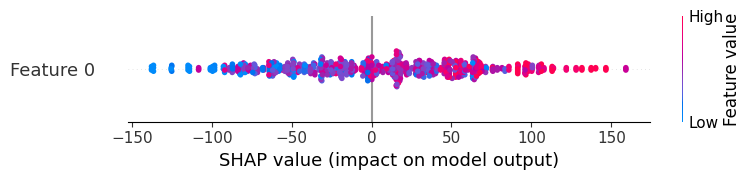

In [119]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)